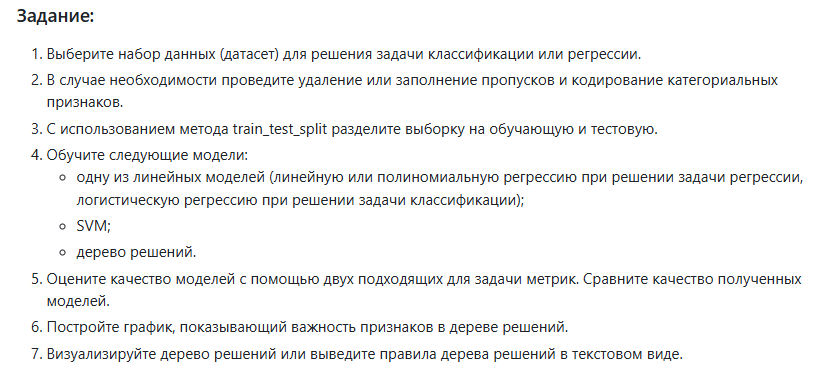

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree, export_text

In [2]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [4]:
# Кодируем категориальные признаки 
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Workout_Type'] = label_encoder.fit_transform(df['Workout_Type'])
df['Experience_Level'] = label_encoder.fit_transform(df['Experience_Level'])

### Разделяем датасет

In [5]:
X = df.drop(['Experience_Level'], axis=1)
y_experience = df['Experience_Level']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_experience, test_size=0.2, random_state=42)
print('Train size:', X_train.shape[0])
print('Test_size:',X_test.shape[0])

Train size: 778
Test_size: 195


### Линейная регрессия

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [8]:
y_pred_lr

array([ 1.13795635,  2.19640625,  0.64018695,  0.09837245,  2.23540963,
        2.18424569,  0.72844602,  0.77008789,  0.68767404,  0.29377536,
        2.0085147 ,  0.4264971 ,  1.01237153,  1.09438584, -0.02104379,
        0.46552557,  0.66068605,  1.72047989,  1.07958104,  0.36409028,
        1.08763098,  0.14580304,  0.88975679,  0.29060945, -0.04045149,
        0.953371  ,  0.16832938, -0.22301397,  1.05857245,  0.65323801,
       -0.15383237,  0.53296235, -0.01320589,  1.65311663,  1.64395861,
        1.65123802,  0.33537959,  1.07015049, -0.16351036,  0.26855582,
       -0.40317668,  0.41316865,  0.11513482,  0.0802917 ,  0.6754223 ,
        0.02787021,  1.06479795,  0.93051205,  1.01859717,  0.84211642,
        0.14327864,  2.14450857,  0.73769449,  1.18940142,  0.2234279 ,
        1.70834481,  0.72360237, -0.3602535 , -0.06969472,  0.90365551,
       -0.16807407,  0.66490465,  2.18927223,  1.72991569,  0.08806472,
        0.61496703,  0.46544642,  2.14272541,  0.49972031,  2.13

### SVM

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

### Decision Tree

In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

### Сравниваем модели

In [12]:
# Метрики Линейной регрессии
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Метрики SVR
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# Метрики Дерева решений
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("         Линейная регрессия                  SVR                    Дерево решений")
print(f"R^2:       {r2_lr:.4f}                           {r2_svr:.4f}                     {r2_dt:.4f}")
print(f"MAE:       {mae_lr:.4f}                           {mae_svr:.4f}                     {mae_dt:.4f}")
print(f"MSE:       {mse_lr:.4f}                           {mse_svr:.4f}                     {mse_dt:.4f}")
print(f"RMSE:      {rmse_lr:.4f}                           {rmse_svr:.4f}                     {rmse_dt:.4f}")

         Линейная регрессия                  SVR                    Дерево решений
R^2:       0.8366                           0.8469                     0.7706
MAE:       0.2536                           0.2151                     0.1333
MSE:       0.0950                           0.0890                     0.1333
RMSE:      0.3082                           0.2983                     0.3651


Разные модели лучше в разных метрииках

### Важность признаков

                          Feature  Importance
7        Session_Duration (hours)    0.693722
12  Workout_Frequency (days/week)    0.188195
8                 Calories_Burned    0.029837
6                     Resting_BPM    0.016715
4                         Max_BPM    0.014568
13                            BMI    0.014218
10                 Fat_Percentage    0.011810
0                             Age    0.010197
2                     Weight (kg)    0.009891
11          Water_Intake (liters)    0.005571
1                          Gender    0.002982
5                         Avg_BPM    0.002294
3                      Height (m)    0.000000
9                    Workout_Type    0.000000


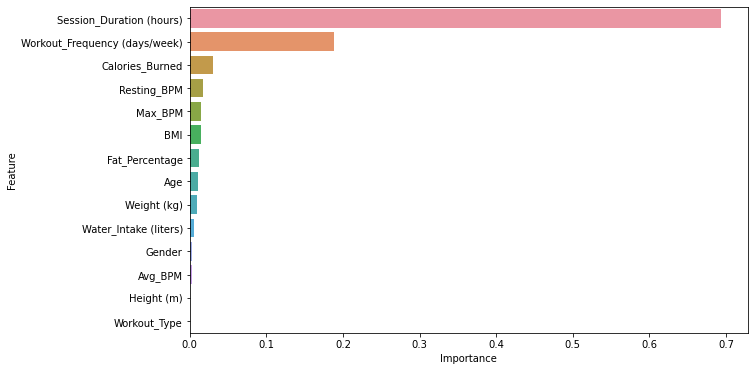

In [14]:
feature_importances = dt_model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

# График важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.show()

### Визуализация Decision Tree

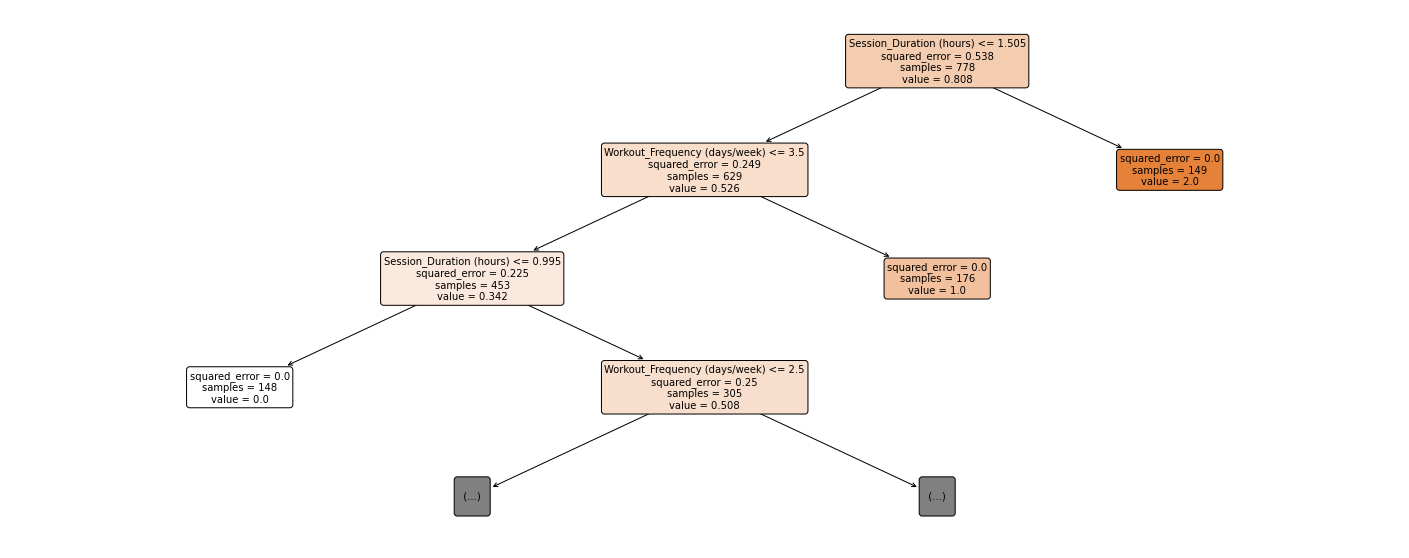




Правила Дерева решений:
|--- Session_Duration (hours) <= 1.50
|   |--- Workout_Frequency (days/week) <= 3.50
|   |   |--- Session_Duration (hours) <= 1.00
|   |   |   |--- value: [0.00]
|   |   |--- Session_Duration (hours) >  1.00
|   |   |   |--- Workout_Frequency (days/week) <= 2.50
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Workout_Frequency (days/week) >  2.50
|   |   |   |   |--- Max_BPM <= 163.50
|   |   |   |   |   |--- Calories_Burned <= 664.50
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- Calories_Burned >  664.50
|   |   |   |   |   |   |--- Weight (kg) <= 93.45
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- Weight (kg) >  93.45
|   |   |   |   |   |   |   |--- Weight (kg) <= 99.65
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- Weight (kg) >  99.65
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- Max_BPM >  163.50
|   |   |   |   |   |--- Calories_Burned

In [19]:
plt.figure(figsize=(25, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3, fontsize=10)
plt.show()

print("\n\n\nПравила Дерева решений:")
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)